# RSMC historical forecasts

General skill

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [196]:
import geopandas as gpd
import matplotlib.pyplot as plt

from src.datasources import rsmc, codab
from src.utils import speed2numcat
from src.constants import *

In [214]:
adm = codab.load_codab(aoi_only=True)

In [215]:
adm_all = adm.dissolve()

In [216]:
df_forecast = rsmc.load_processed_historical_forecasts()
df_forecast = df_forecast.drop_duplicates(
    subset=["numberseason", "issue_time", "valid_time"]
)

In [217]:
df_forecast["num_cat"] = df_forecast["max_wind_kt"].apply(speed2numcat)

In [218]:
df_forecast["lt_hour_6"] = df_forecast["lt_hour"] % 6 == 0
df_forecast["lt_hour_12"] = df_forecast["lt_hour"] % 12 == 0

In [219]:
df_actual = df_forecast[df_forecast["lt_hour"] == 0]
cols = ["latitude", "longitude", "max_wind_kt", "num_cat"]
df_actual = df_actual.rename(columns={x: f"{x}_obsv" for x in cols})
df_actual = df_actual.drop(
    columns=[
        "issue_time",
        "lt_hour",
        "cyclone_name",
        "min_presssure_hpa",
        "lt_hour_6",
        "lt_hour_12",
    ]
)

In [220]:
df_actual

,cyclone_number,basin,valid_time,latitude_obsv,longitude_obsv,max_wind_kt_obsv,season,numberseason,num_cat_obsv
0,6,SWI,2014-01-11 06:00:00+00:00,-16.07,80.18,50.0,20132014,0620132014,3
13,9,SWI,2021-01-27 12:00:00+00:00,-19.61,90.37,30.0,20202021,0920202021,1
26,11,SWI,2021-02-19 00:00:00+00:00,-23.97,37.17,50.0,20202021,1120202021,3
39,4,SWI,2013-12-30 12:00:00+00:00,-11.85,52.90,65.0,20132014,0420132014,4
52,12,SWI,2012-03-02 12:00:00+00:00,-16.50,63.09,25.0,20112012,1220112012,0
...,...,...,...,...,...,...,...,...,...
41319,7,SWI,2023-02-18 06:00:00+00:00,-16.07,70.48,100.0,20222023,0720222023,5
41332,8,SWI,2015-01-28 12:00:00+00:00,-14.20,64.80,70.0,20142015,0820142015,4
41345,5,SWI,2018-12-20 06:00:00+00:00,-12.55,59.50,60.0,20182019,0520182019,3
41358,9,SWI,2015-02-09 06:00:00+00:00,-34.98,42.84,40.0,20142015,0920142015,2


In [221]:
df_compare = df_forecast.merge(df_actual)

In [222]:
df_compare

,cyclone_name,cyclone_number,basin,lt_hour,valid_time,latitude,longitude,min_presssure_hpa,max_wind_kt,issue_time,season,numberseason,num_cat,lt_hour_6,lt_hour_12,latitude_obsv,longitude_obsv,max_wind_kt_obsv,num_cat_obsv
0,COLIN,6,SWI,0,2014-01-11 06:00:00+00:00,-16.070,80.180,986.0,50.0,2014-01-11 06:00:00+00:00,20132014,0620132014,3,True,True,-16.070,80.18,50.0,3
1,COLIN,6,SWI,6,2014-01-11 12:00:00+00:00,-16.569,79.760,NaN,57.5,2014-01-11 06:00:00+00:00,20132014,0620132014,3,True,False,-16.617,79.66,85.0,4
2,COLIN,6,SWI,12,2014-01-11 18:00:00+00:00,-17.040,79.290,NaN,65.0,2014-01-11 06:00:00+00:00,20132014,0620132014,4,True,True,-17.050,79.17,95.0,5
3,COLIN,6,SWI,18,2014-01-12 00:00:00+00:00,-17.485,78.725,NaN,72.5,2014-01-11 06:00:00+00:00,20132014,0620132014,4,True,False,-17.680,78.63,95.0,5
4,COLIN,6,SWI,24,2014-01-12 06:00:00+00:00,-18.020,78.030,NaN,80.0,2014-01-11 06:00:00+00:00,20132014,0620132014,4,True,True,-18.310,78.11,100.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26875,IRINA,11,SWI,72,2012-03-07 18:00:00+00:00,-25.920,37.240,NaN,50.0,2012-03-04 18:00:00+00:00,20112012,1120112012,3,True,True,-29.450,40.40,50.0,3
26876,IRINA,11,SWI,84,2012-03-08 06:00:00+00:00,-25.660,35.970,NaN,60.0,2012-03-04 18:00:00+00:00,20112012,1120112012,3,True,True,-29.200,40.20,40.0,2
26877,IRINA,11,SWI,96,2012-03-08 18:00:00+00:00,-25.760,34.590,NaN,65.0,2012-03-04 18:00:00+00:00,20112012,1120112012,4,True,True,-29.660,39.78,40.0,2
26878,IRINA,11,SWI,108,2012-03-09 06:00:00+00:00,-26.040,33.350,NaN,75.0,2012-03-04 18:00:00+00:00,20112012,1120112012,4,True,True,-29.200,38.15,30.0,1


In [223]:
cols = ["numberseason", "valid_time", "lt_hour"]
gdf_forecast = gpd.GeoDataFrame(
    data=df_compare[cols + ["latitude", "longitude"]],
    geometry=gpd.points_from_xy(
        df_compare["longitude"], df_compare["latitude"]
    ),
    crs=4326,
).to_crs(3857)
gdf_obsv = gpd.GeoDataFrame(
    data=df_compare[cols + ["latitude_obsv", "longitude_obsv"]],
    geometry=gpd.points_from_xy(
        df_compare["longitude_obsv"], df_compare["latitude_obsv"]
    ),
    crs=4326,
).to_crs(3857)

In [224]:
gdf_forecast

,numberseason,valid_time,lt_hour,latitude,longitude,geometry
0,0620132014,2014-01-11 06:00:00+00:00,0,-16.070,80.180,POINT (8925596.772 -1812830.581)
1,0620132014,2014-01-11 12:00:00+00:00,6,-16.569,79.760,POINT (8878842.586 -1870711.241)
2,0620132014,2014-01-11 18:00:00+00:00,12,-17.040,79.290,POINT (8826522.425 -1925481.773)
3,0620132014,2014-01-12 00:00:00+00:00,18,-17.485,78.725,POINT (8763626.913 -1977355.746)
4,0620132014,2014-01-12 06:00:00+00:00,24,-18.020,78.030,POINT (8686259.867 -2039889.642)
...,...,...,...,...,...,...
26875,1120112012,2012-03-07 18:00:00+00:00,72,-25.920,37.240,POINT (4145537.837 -2989175.97)
26876,1120112012,2012-03-08 06:00:00+00:00,84,-25.660,35.970,POINT (4004162.084 -2957031.064)
26877,1120112012,2012-03-08 18:00:00+00:00,96,-25.760,34.590,POINT (3850541.187 -2969386.152)
26878,1120112012,2012-03-09 06:00:00+00:00,108,-26.040,33.350,POINT (3712505.018 -3004035.959)


In [225]:
df_compare["distance_error_km"] = gdf_forecast.distance(gdf_obsv) / 1000

In [226]:
df_compare["distance_to_moz_km"] = (
    gdf_forecast.to_crs(3857).distance(adm_all.to_crs(3857).iloc[0].geometry)
    / 1000
)

In [227]:
df_compare["max_wind_error_kt"] = (
    df_compare["max_wind_kt"] - df_compare["max_wind_kt_obsv"]
)
df_compare["max_wind_error_ms"] = df_compare["max_wind_error_kt"] * KNOTS2MS

Text(0, 0.5, 'mean wind speed error (m/s)')

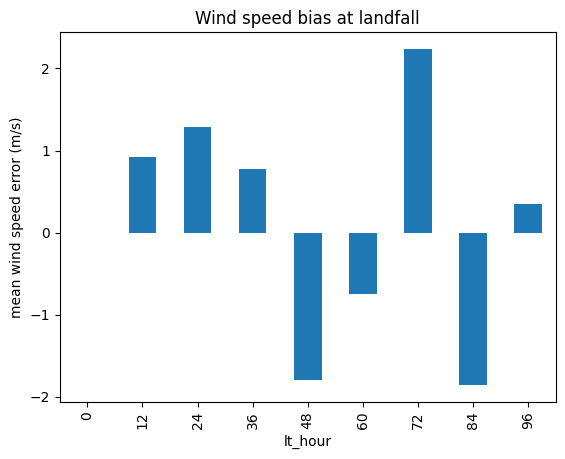

In [234]:
ax = (
    df_compare[
        (df_compare["lt_hour_12"])
        & (df_compare["lt_hour"] <= 96)
        & (df_compare["distance_to_moz_km"] == 0)
    ]
    .groupby("lt_hour")["max_wind_error_ms"]
    .mean()
    .plot.bar()
)
ax.set_title("Wind speed bias at landfall")
ax.set_ylabel("mean wind speed error (m/s)")

<Axes: xlabel='lt_hour'>

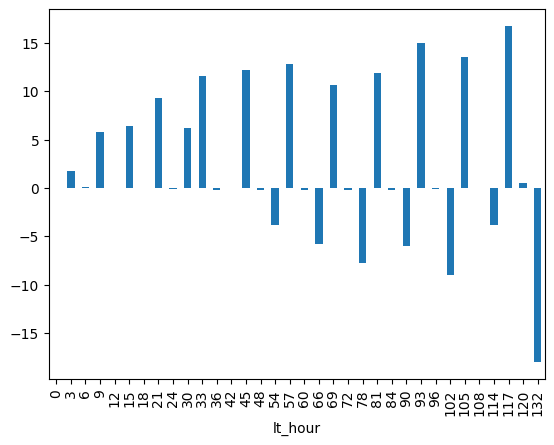

In [229]:
df_compare.groupby("lt_hour")["max_wind_error_ms"].mean().plot.bar()

Text(0, 0.5, 'mean distance error (km)')

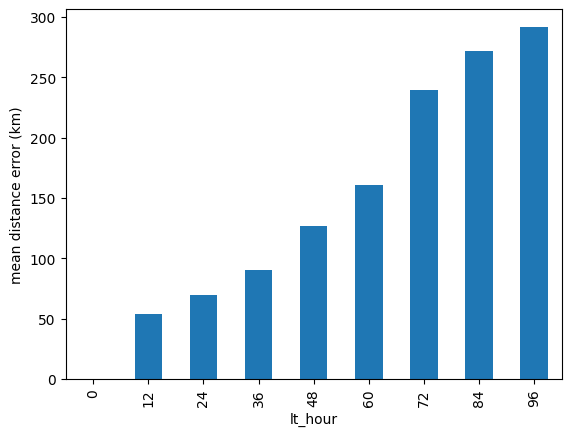

In [236]:
ax = (
    df_compare[
        (df_compare["lt_hour_12"])
        & (df_compare["lt_hour"] <= 96)
        & (df_compare["distance_to_moz_km"] == 0)
    ]
    .groupby("lt_hour")["distance_error_km"]
    .mean()
    .plot.bar()
)
ax.set_ylabel("mean distance error (km)")